We read data from the Global Human Settlement Layer (GHSL): https://ghsl.jrc.ec.europa.eu/download.php?ds=pop

In [1]:
import rasterio
url = 'https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/GHS_POP_E2000_GLOBE_R2023A_54009_1000/V1-0/tiles/GHS_POP_E2000_GLOBE_R2023A_54009_1000_V1_0_R6_C21.zip'
dataset = rasterio.open(url.split('/')[-1].replace('.zip','.tif'))
pop_array = dataset.read(1)

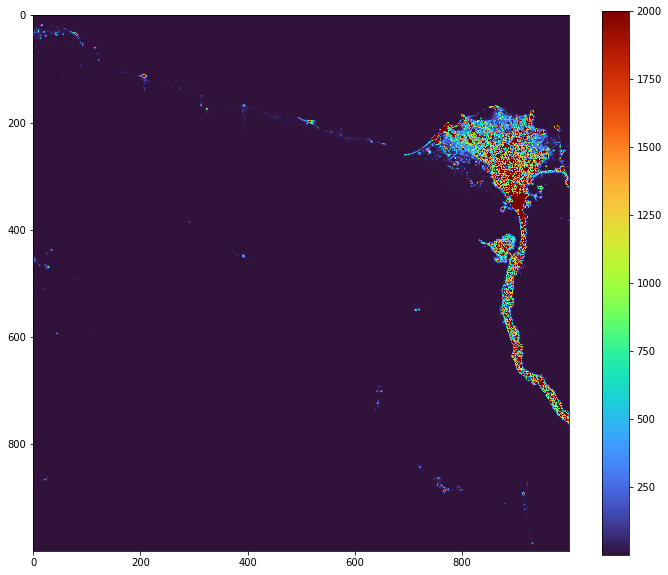

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure(figsize=(12,10))
plt.imshow(pop_array,vmin=1,vmax=2000,cmap='turbo')
plt.colorbar()

Now we want the axes to be labelled in geographical coordinates. We obtain them fron pixel coordinates using `pyproj`. We know that the projection used by GHSL is ESRI 54009, an elliptical projection (2D) from the WGS 84 geodetic system (=EPSG:4326).

From StackExchange:

* *Google Earth is in a Geographic coordinate system with the wgs84 datum. (EPSG: 4326)*

* *Google Maps is in a projected coordinate system that is based on the wgs84 datum. (EPSG 3857)*

* *The data in Open Street Map database is stored in a gcs with units decimal degrees & datum of wgs84. (EPSG: 4326)*

* *The Open Street Map tiles and the WMS webservice, are in the projected coordinate system that is based on the wgs84 datum. (EPSG 3857)*

*So if you are making a web map, which uses the tiles from Google Maps or tiles from the Open Street Map webservice, they will be in Sperical Mercator (EPSG 3857 or srid: 900913) and hence your map has to have the same projection.*



In [3]:
from pyproj import CRS 
CRS.from_string('ESRI:54009')

# See also: https://spatialreference.org/ref/esri/54009/wkt.html

<Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Mollweide
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
import pyproj
p = pyproj.Proj("ESRI:54009")

allX=[]
allY=[]
allP=[]
for iii in range(dataset.height):
    for jjj in range(dataset.width):
        ppp = pop_array[iii][jjj]
        if ppp > 0:
            xy_cell = dataset.xy(iii,jjj)
            lonlat = p(xy_cell[0],xy_cell[1], inverse=True)
            allX.append(lonlat[0])
            allY.append(lonlat[1])
            allP.append(ppp)

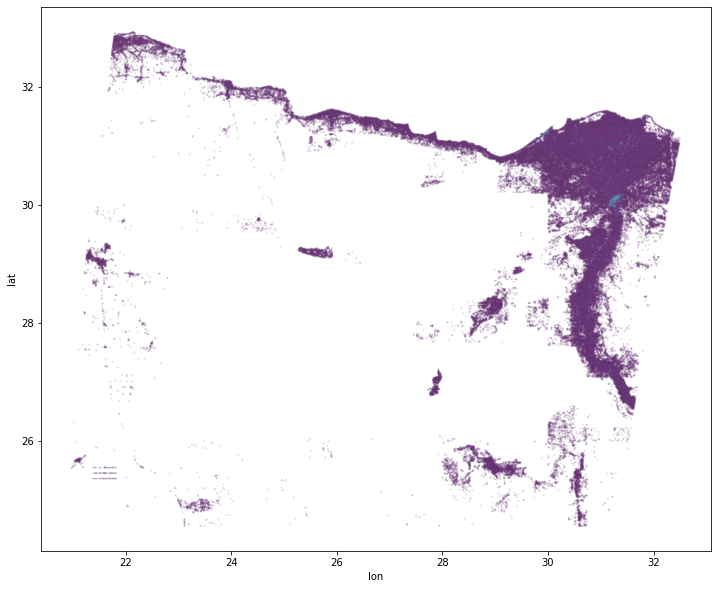

In [5]:
plt.figure(figsize=(12,10))
plt.scatter(allX,allY,c=allP,s=1,alpha=0.1)
plt.xlabel('lon')
plt.ylabel('lat');